# Preprocess data of different files
From raw survey data relevant columns are extracted converted to numerical values and used to create new interesting columns. It outputs the data to the output_path specified.
TODO:
- Correct values on insulation
- Add all surveys
- Add measurements of sensors to df

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from datetime import datetime

# Preprocessing of Umfrage_online_18m.xlsx

In [41]:
# Importing survey data
data_path = 'data/raw/Umfrage_online_18m.xlsx'
output_path = 'data/output/survey_'+ datetime.date(datetime.now()).__str__() + '.csv'
df = pd.read_excel(data_path, index_col=0)
df

,Bitte wählen Sie Ihre bevorzugte Sprache aus / Please select your preferred language:,1. Geschlecht:,2. Alter:,3. Körpergröße (in cm),4. Körpergewicht (in kg),5. Wie bewerten Sie Ihr DERZEITIGES körperliches Befinden insgesamt?,6. Bitte bewerten Sie Ihr DERZEITIGES Temperaturempfinden auf den folgenden Skalen. Mir ist: [Gesamt],6. Bitte bewerten Sie Ihr DERZEITIGES Temperaturempfinden auf den folgenden Skalen. Mir ist: [Kopf],6. Bitte bewerten Sie Ihr DERZEITIGES Temperaturempfinden auf den folgenden Skalen. Mir ist: [Hände],6. Bitte bewerten Sie Ihr DERZEITIGES Temperaturempfinden auf den folgenden Skalen. Mir ist: [Füße],...,7. Ich empfinde die Temperatur- und Luftverhältnisse in meiner Umgebung als: [Hände],7. Ich empfinde die Temperatur- und Luftverhältnisse in meiner Umgebung als: [Füße],8. Wie lange fahren Sie schon auf dem Bus?,Kopf und Hände,Öberkörper,Beine,Füße,10. Bitte geben Sie an ob Sie sitzen oder stehen:,11. Bitte geben Sie Ihre Position im Bus an:,"12. Bitte geben Sie an, ob sie näher einer Fenster oder dem Gang sind:"
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-11-23 08:53:51,Deutsch / German,Weiblich,62,162,60,Mittel,Leicht kühl,Leicht kühl,Leicht kühl,Leicht kühl,...,Leicht unangenehm,Leicht unangenehm,Weniger als 15 Minuten,Schal,"Pullover, dünn;Jacke, dick","Hose, lang","Socke, dick;Winterschuhe",Ich sitze,Vorderwagen - Vordere Tür,Gang
2021-11-23 08:57:47,Deutsch / German,Weiblich,36,163,65,Mittel,Neutral,Neutral,Neutral,Neutral,...,Angenehm,Angenehm,Weniger als 15 Minuten,Mütze,"Pullover, dick","Hose, lang","Socke, dünn;Stiefel",Ich sitze,Hinterwagen - Hinterbereich,Gang
2021-11-23 09:12:25,Deutsch / German,Weiblich,23,168,68,Schlecht,Leicht kühl,Leicht kühl,Kühl,Kalt,...,Angenehm,Angenehm,15 bis 30 Minuten,Keine der oben gezeigten Optionen,"T-Shirt;Pullover, dick;Jacke, dünn","Hose, lang;Strumpfhose","Socke, dünn;Sommerschuhe",Ich sitze,Vorderwagen - Zwischen den Türen,Gang
2021-11-23 09:15:20,Deutsch / German,Weiblich,22,178,80,Mittel,Neutral,Neutral,Neutral,Neutral,...,Leicht unangenehm,Leicht unangenehm,Weniger als 15 Minuten,Schal;Mütze,"Pullover, dünn;Jacke, dünn","Hose, lang","Socke, dünn;Sommerschuhe",Ich sitze,Vorderwagen - Hintere Tür,Fenster
2021-11-23 09:17:59,Deutsch / German,Weiblich,25,163,65,Schlecht,Neutral,Neutral,Leicht kühl,Kühl,...,Angenehm,Angenehm,Weniger als 15 Minuten,Schal,"Pullover, dünn;Jacke, dick","Hose, lang","Socke, dünn;Sommerschuhe",Ich sitze,Hinterwagen - Tür,Fenster
2021-11-23 09:19:28,Deutsch / German,Weiblich,27,168,57,Mittel,Neutral,Neutral,Kühl,Kühl,...,Angenehm,Angenehm,30 bis 45 Minuten,Keine der oben gezeigten Optionen,"Pullover, dick;Jacke, dünn","Hose, lang","Socke, dünn;Sommerschuhe",Ich sitze,Hinterwagen - Tür,Fenster
2021-11-23 09:32:25,Deutsch / German,Männlich,38,187,69,Mittel,Neutral,Neutral,Neutral,Neutral,...,Angenehm,Angenehm,Weniger als 15 Minuten,Keine der oben gezeigten Optionen,"Pullover, dünn;Jacke, dünn","Hose, lang","Socke, dünn;Sommerschuhe",Ich sitze,Gelenkbereich,Gang
2021-11-23 09:36:41,Deutsch / German,Männlich,73,167,83,Gut,Neutral,Neutral,Neutral,Neutral,...,Angenehm,Angenehm,Weniger als 15 Minuten,Mütze,"T-Shirt;Jacke, dick","Hose, lang","Socke, dick;Winterschuhe",Ich sitze,Gelenkbereich,Fenster
2021-11-23 10:02:34,Deutsch / German,Männlich,61,176,80,Mittel,Leicht kühl,Kühl,Neutral,Neutral,...,Angenehm,Angenehm,Weniger als 15 Minuten,Keine der oben gezeigten Optionen,"Pullover, dick;Jacke, dünn","Hose, lang","Socke, dünn;Winterschuhe",Ich sitze,Hinterwagen - Tür,Gang


In [42]:
# Extracting only interesting columns
interesting_columns = [
 '1. Geschlecht:',
 '2. Alter:',
 '3. Körpergröße (in cm)',
 '4. Körpergewicht (in kg)',
 '5. Wie bewerten Sie Ihr DERZEITIGES körperliches Befinden insgesamt?',
 '6. Bitte bewerten Sie Ihr DERZEITIGES Temperaturempfinden auf den folgenden Skalen. Mir ist: [Gesamt]',
 '7. Ich empfinde die Temperatur- und Luftverhältnisse in meiner Umgebung als: [Gesamt]',
 '8. Wie lange fahren Sie schon auf dem Bus?',
 'Kopf und Hände',
 'Öberkörper',
 'Beine',
 'Füße',
 '10. Bitte geben Sie an ob Sie sitzen oder stehen:',
 '11. Bitte geben Sie Ihre Position im Bus an:',
 '12. Bitte geben Sie an, ob sie näher einer Fenster oder dem Gang sind:']

df = df[interesting_columns]

In [43]:
# Defining categorical data to convert in numerical values
categorical_columns = [
 '1. Geschlecht:',
 '5. Wie bewerten Sie Ihr DERZEITIGES körperliches Befinden insgesamt?',
 '6. Bitte bewerten Sie Ihr DERZEITIGES Temperaturempfinden auf den folgenden Skalen. Mir ist: [Gesamt]',
 '7. Ich empfinde die Temperatur- und Luftverhältnisse in meiner Umgebung als: [Gesamt]',
 '8. Wie lange fahren Sie schon auf dem Bus?',
 '10. Bitte geben Sie an ob Sie sitzen oder stehen:',
 '11. Bitte geben Sie Ihre Position im Bus an:',
 '12. Bitte geben Sie an, ob sie näher einer Fenster oder dem Gang sind:']

In [44]:
categorical_dict = {}
for column in categorical_columns:
 map_dict = {}
 for i, value in enumerate(df[column].unique()):
  map_dict[value] = i
 categorical_dict[column] = map_dict

In [45]:
categorical_dict['5. Wie bewerten Sie Ihr DERZEITIGES körperliches Befinden insgesamt?'] = \
 {'Mittel': 1,
  'Schlecht': 0,
  'Gut': 2,
  'Sehr gut': 3}
categorical_dict['6. Bitte bewerten Sie Ihr DERZEITIGES Temperaturempfinden auf den folgenden Skalen. Mir ist: [Gesamt]'] =  {'Leicht kühl': 2,
  'Neutral': 3,
  'Kühl': 1,
  'Kalt': 0,
  'Leicht warm': 4,
  'Warm': 5}

In [46]:
df = df.replace(categorical_dict)

In [47]:
# Using clothing_columns to define user insulation value
clothing_columns = [
 'Kopf und Hände',
 'Öberkörper',
 'Beine',
 'Füße']

In [48]:
# Separate string column
df[clothing_columns] = df[clothing_columns].apply(lambda x: x.str.split(';'))

In [49]:
# Join columns
df['clothing'] = df['Kopf und Hände'] + df['Öberkörper'] + df['Beine'] + df['Füße']
# Drop columns
df.drop(clothing_columns, axis=1, inplace=True)

In [50]:
# Create list of unique clothing items
clothing_items = []
for index, values in df['clothing'].iteritems():
 clothing_items += values
 clothing_items = list(set(clothing_items))

In [51]:
def clothing_thermal_insulation(x):
 """
 Calculate thermal insulation value from cloth used

 :param x: list of clothing items
 :return: insulation value
 """
 insulation = 0
 insulation_dict = {'Strumpfhose': 3,
 'Sommerschuhe': 2,
 'Übergangsschuhe': 3,
 'Hemd / Bluse, langer Arm': 6,
 'Jacke, dünn': 8,
 'Mütze': 2,
 'Handschuhe': 2,
 'Schal': 2,
 'Stiefel': 3,
 'Jogginghose': 4,
 'Socke, dick': 3,
 'Mantel': 9,
 'Pullover, dick': 9,
 'Hose, lang': 6,
 'Pullover, dünn': 5,
 'Socke, dünn': 1,
 'Keine der oben gezeigten Optionen': 0,
 'Winterschuhe': 5,
 'Jacke, dick': 10,
 'T-Shirt': 6}
 for item in x:
  insulation += insulation_dict[item]
 return insulation

In [52]:
df['clothing_insulation'] = df['clothing'].apply(clothing_thermal_insulation)

In [53]:
# Summarizing comfort related questions to one mean value
df['comfort'] = df[['5. Wie bewerten Sie Ihr DERZEITIGES körperliches Befinden insgesamt?',
 '6. Bitte bewerten Sie Ihr DERZEITIGES Temperaturempfinden auf den folgenden Skalen. Mir ist: [Gesamt]',
 '7. Ich empfinde die Temperatur- und Luftverhältnisse in meiner Umgebung als: [Gesamt]']].mean(axis=1)
df.drop(['5. Wie bewerten Sie Ihr DERZEITIGES körperliches Befinden insgesamt?',
 '6. Bitte bewerten Sie Ihr DERZEITIGES Temperaturempfinden auf den folgenden Skalen. Mir ist: [Gesamt]',
 '7. Ich empfinde die Temperatur- und Luftverhältnisse in meiner Umgebung als: [Gesamt]', 'clothing'], axis=1, inplace=True)

In [54]:
df

,1. Geschlecht:,2. Alter:,3. Körpergröße (in cm),4. Körpergewicht (in kg),8. Wie lange fahren Sie schon auf dem Bus?,10. Bitte geben Sie an ob Sie sitzen oder stehen:,11. Bitte geben Sie Ihre Position im Bus an:,"12. Bitte geben Sie an, ob sie näher einer Fenster oder dem Gang sind:",clothing_insulation,comfort
Timestamp,,,,,,,,,,
2021-11-23 08:53:51,0,62,162,60,0,0,0.0,0,31,1.000000
2021-11-23 08:57:47,0,36,163,65,0,0,1.0,0,21,1.666667
2021-11-23 09:12:25,0,23,168,68,1,0,2.0,0,35,1.000000
2021-11-23 09:15:20,0,22,178,80,0,0,3.0,1,26,1.333333
2021-11-23 09:17:59,0,25,163,65,0,0,4.0,1,26,1.333333
2021-11-23 09:19:28,0,27,168,57,2,0,4.0,1,26,1.666667
2021-11-23 09:32:25,1,38,187,69,0,0,5.0,0,22,1.666667
2021-11-23 09:36:41,1,73,167,83,0,0,5.0,1,32,2.000000
2021-11-23 10:02:34,1,61,176,80,0,0,4.0,0,29,1.333333


In [55]:
df.to_csv(output_path, index=False)

# Preprocessing of Daten_Messung_210826_Gelenkbus_5430.xlsx and Daten_Messung_211123_Gelenkbus_5431.xlsx

In [56]:
# Importing survey data
data_path = 'data/raw/Daten_Messung_210826_Gelenkbus_5430.xlsx'
df1 = pd.read_excel(data_path, index_col=0)
df1['dataset'] = 'August'

data_path = 'data/raw/Daten_Messung_211123_Gelenkbus_5431.xlsx'
df2 = pd.read_excel(data_path, index_col=0)
df2['dataset'] = 'November'

data_path = 'data/raw/Daten_Messung_220330_Gelenkbus_5431.xlsx'
df3 = pd.read_excel(data_path, index_col=0)
df3['dataset'] = 'March'

data_path = 'data/raw/Daten_Messung_220407_Gelenkbus_5430.xlsx'
df4 = pd.read_excel(data_path, index_col=0)
df4['dataset'] = 'April'

output_path = 'data/output/data_complete_'+ datetime.date(datetime.now()).__str__() + '.csv'

In [57]:
df = pd.concat([df1, df2, df3, df4])

In [58]:
df

,Outside Temperature,Avg. Temperature,Feet temperature,Temperature difference,RH,va,Tg,Gender,Age,Height,...,Thermal comfort (global),Thermal comfort (head),Thermal comfort (hands),Thermal comfort (feet),Position,Window / alley,Duration,Icl,dataset,Activity
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-08-26 08:52:06.795000,15.69,18.560,17.440,2.920,73.440,0.040,17.870,0,23,169,...,0,0.0,0.0,0.0,Gelenkbereich,Gang,Weniger als 15 Minuten,1.06280,August,NaN
2021-08-28 08:53:29.827000,15.59,19.185,19.220,1.650,74.410,0.155,18.125,1,18,186,...,0,0.0,0.0,0.0,Hinterwagen - Tür,Gang,15 to 30 minutes,0.82065,August,NaN
2021-08-26 08:57:16.568000,15.69,19.580,18.965,1.745,73.255,0.020,18.905,0,33,160,...,0,0.0,0.0,0.0,Hinterwagen - Hinterbereich,Fenster,Less than 15 minutes,0.72045,August,NaN
2021-08-26 08:57:34.979000,15.69,19.105,19.030,1.615,73.275,0.240,18.155,0,26,167,...,1,1.0,1.0,1.0,Hinterwagen - Tür,Fenster,Weniger als 15 Minuten,0.65365,August,NaN
2021-08-26 08:58:22.123000,15.69,19.050,16.810,3.470,77.180,0.240,18.620,0,47,172,...,0,0.0,0.0,0.0,Vorderwagen - Vordere Tür,Gang,Weniger als 15 Minuten,0.74550,August,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/04/07 4:37:58 PM GMT+2,7.90,16.460,15.500,1.370,62.940,0.020,17.060,0,43,163,...,0,0.0,0.0,0.0,Vorderwagen - Zwischen den Türen,Gang,NaN,1.16300,April,1.0
2022/04/07 4:38:06 PM GMT+2,7.90,17.325,14.220,4.035,58.420,0.080,19.155,1,26,180,...,0,0.0,0.0,1.0,Hinterwagen - Hinterbereich,Fenster,Between 0 and 20 minutes,1.27155,April,1.0
2022/04/07 4:42:09 PM GMT+2,7.70,17.020,15.380,1.920,69.170,0.070,16.690,1,27,185,...,1,1.0,1.0,2.0,Vorderwagen - Zwischen den Türen,Fenster,Between 0 and 5 minutes,1.09620,April,1.0


In [59]:
df.columns

Index(['Outside Temperature', 'Avg. Temperature', 'Feet temperature',
       'Temperature difference', 'RH', 'va', 'Tg', 'Gender', 'Age', 'Height',
       'Weight', 'Well-being', 'Thermal feeling (global)',
       'Thermal feeling (head)', 'Thermal feeling (hands)',
       'Thermal feeling (feet)', 'Thermal comfort (global)',
       'Thermal comfort (head)', 'Thermal comfort (hands)',
       'Thermal comfort (feet)', 'Position', 'Window / alley', 'Duration',
       'Icl', 'dataset', 'Activity'],
      dtype='object')

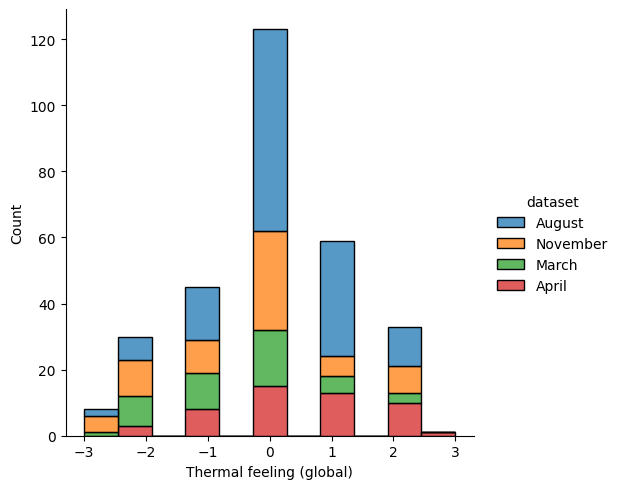

In [60]:
import seaborn as sns

sns.displot(data=df.reset_index(), x='Thermal feeling (global)', hue="dataset", multiple="stack")
plt.show()

In [61]:
df.describe()

,Outside Temperature,Avg. Temperature,Feet temperature,Temperature difference,RH,va,Tg,Gender,Age,Height,...,Thermal feeling (global),Thermal feeling (head),Thermal feeling (hands),Thermal feeling (feet),Thermal comfort (global),Thermal comfort (head),Thermal comfort (hands),Thermal comfort (feet),Icl,Activity
count,299.000000,299.000000,299.000000,299.000000,299.000000,289.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,297.000000,298.000000,297.000000,299.000000,298.000000,298.000000,298.000000,299.000000,166.000000
mean,12.634448,18.432746,16.881187,2.538783,60.938512,0.108858,18.181388,0.458194,37.301003,171.983278,...,-0.003344,0.124579,0.073826,-0.117845,0.321070,0.265101,0.328859,0.352349,0.965281,0.987952
std,4.514432,3.787157,4.456206,1.302612,12.479144,0.100342,4.000130,0.499084,17.546765,14.600372,...,1.210963,1.115600,5.970290,1.369153,0.576897,0.544507,0.618927,0.646158,0.268261,0.109431
min,5.200000,10.640000,2.545000,0.845000,31.980000,0.000000,9.810000,0.000000,0.000000,0.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.311300,0.000000
25%,7.900000,16.047500,13.017500,1.630000,54.180000,0.030000,14.630000,0.000000,24.000000,165.000000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.753850,1.000000
50%,13.100000,19.120000,17.870000,2.240000,60.850000,0.080000,18.690000,0.000000,34.000000,172.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970950,1.000000
75%,17.150000,21.375000,20.030000,3.022500,71.700000,0.160000,21.220000,1.000000,47.000000,180.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.167175,1.000000
max,19.200000,24.925000,25.095000,7.830000,86.160000,0.705000,25.310000,1.000000,87.000000,200.000000,...,3.000000,3.000000,100.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.847700,1.000000


In [62]:
interesting_columns =['dataset','Outside Temperature', 'Avg. Temperature', 'RH', 'va', 'Tg', 'Gender', 'Age', 'Height',
       'Weight', 'Duration',
       'Icl', 'Thermal feeling (global)']

In [63]:
df = df[interesting_columns]

In [64]:
list(df['Duration'].unique())

['Weniger als 15 Minuten',
 '15 to 30 minutes',
 'Less than 15 minutes',
 '15 bis 30 Minuten',
 '45 Minuten bis 1 Stunde',
 'Länger als 1 Stunde',
 '30 bis 45 Minuten',
 nan,
 'Between 0 and 10 minutes',
 'Between 0 and 15 minutes',
 'Between 0 and 20 minutes',
 'Between 0 and 25 minutes',
 'Between 10 and 25 minutes',
 'Between 10 and 30 minutes',
 'Between 0 and 5 minutes',
 'Between 10 and 15 minutes',
 'Between 15 and 20 minutes',
 'Between 20 and 35 minutes',
 'Between 15 and 30 minutes',
 'Between 30 and 45 minutes',
 'Between 15 and 25 minutes',
 'Between 30 and 35 minutes']

In [65]:
duration_map = {'Weniger als 15 Minuten': 7.5,
 '15 to 30 minutes': 22.5,
 'Less than 15 minutes': 7.5,
 '15 bis 30 Minuten': 22.5,
 '45 Minuten bis 1 Stunde': 52.5,
 'Länger als 1 Stunde': 60,
 '30 bis 45 Minuten': 37.5,
 'Between 0 and 10 minutes': 5,
 'Between 0 and 15 minutes': 7.5,
 'Between 0 and 20 minutes': 10,
 'Between 0 and 25 minutes': 12.5,
 'Between 10 and 25 minutes': 17.5,
 'Between 10 and 30 minutes': 20,
 'Between 0 and 5 minutes': 2.5,
 'Between 10 and 15 minutes': 12.5,
 'Between 15 and 20 minutes':17.5,
 'Between 20 and 35 minutes':27.5,
 'Between 15 and 30 minutes': 22.5,
 'Between 30 and 45 minutes': 37.5,
 'Between 15 and 25 minutes': 20,
 'Between 30 and 35 minutes': 32.5}

In [66]:
df['Duration'] = df['Duration'].replace(duration_map)

/tmp/ipykernel_91554/1387134683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = df['Duration'].replace(duration_map)


In [67]:
df.dropna(inplace=True)

/tmp/ipykernel_91554/658506679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [68]:
df.to_csv(output_path, index=False)